<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">SUICIDE RATES DATA ANALYSIS</h2>
</div>

<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
plt.rcParams['figure.figsize']=[15,8]
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')


<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
df = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


#### If The dataset contain 'NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?' values .We need to replace with Null.

In [5]:
df.replace(['NaN', 'N/A', 'NA', 'n/a', 'n.a.', 'N#A', 'n#a', '?'], 'other', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
df.shape

(27820, 12)

## Summary Statistics of numeric variables:

In [8]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2001.26,8.47,1985.00,1995.00,2002.00,2008.00,2016.00
suicides_no,27820.0,242.57,902.05,0.00,3.00,25.00,131.00,22338.00
population,27820.0,1844793.62,3911779.44,278.00,97498.50,430150.00,1486143.25,43805214.00
suicides/100k pop,27820.0,12.82,18.96,0.00,0.92,5.99,16.62,224.97
HDI for year,8364.0,0.78,0.09,0.48,0.71,0.78,0.86,0.94
gdp_per_capita ($),27820.0,16866.46,18887.58,251.00,3447.00,9372.00,24874.00,126352.00


In [9]:
df.describe(include="all").T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Mauritius,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820.0,NaN,NaN,NaN,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
sex,27820,2,male,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,15-24 years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,27820.0,NaN,NaN,NaN,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
population,27820.0,NaN,NaN,NaN,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
suicides/100k pop,27820.0,NaN,NaN,NaN,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
country-year,27820,2321,Albania1987,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HDI for year,8364.0,NaN,NaN,NaN,0.776601,0.093367,0.483,0.713,0.779,0.855,0.944
gdp_for_year ($),27820,2321,"2,156,624,900",12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['year', 'suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']
Categorical variables: ['country', 'sex', 'age', 'country-year', ' gdp_for_year ($) ', 'generation']


In [11]:
# Count the number of categorical and numerical variables
categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 6
Number of numerical variables: 6


In [12]:
# Unique values for categorical features
print(df.select_dtypes(include=['object']).nunique())

country                101
sex                      2
age                      6
country-year          2321
 gdp_for_year ($)     2321
generation               6
dtype: int64


## Missing Value

In [13]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
country,0,0.00
year,0,0.00
sex,0,0.00
age,0,0.00
suicides_no,0,0.00
population,0,0.00
suicides/100k pop,0,0.00
country-year,0,0.00
HDI for year,19456,69.94
gdp_for_year ($),0,0.00


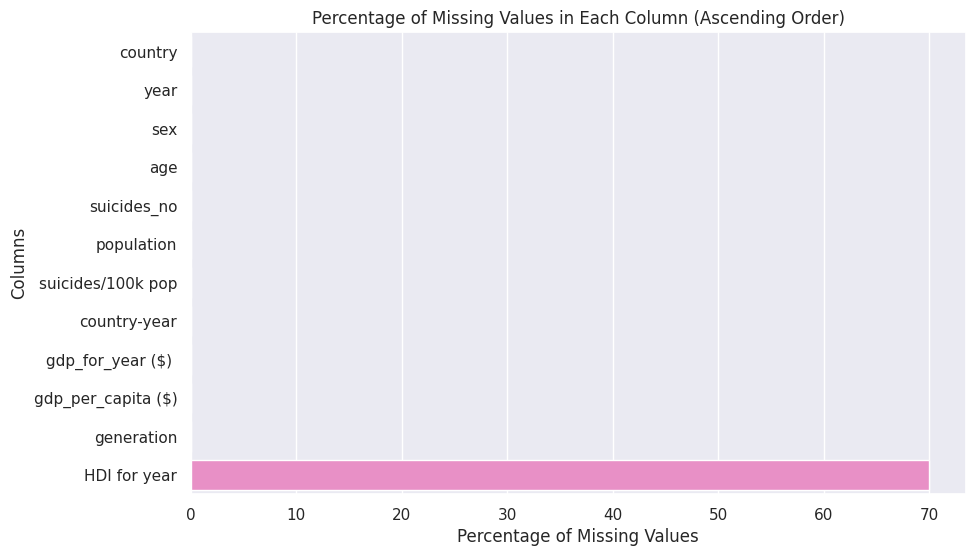

In [14]:
# Calculate the percentage of missing values for each column
missing_values_percentage = df.isnull().mean() * 100

# Now you can sort and visualize the missing values
missing_values_percentage_sorted = missing_values_percentage.sort_values()

# Visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage_sorted, y=missing_values_percentage_sorted.index)
plt.title('Percentage of Missing Values in Each Column (Ascending Order)')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.show()

<Axes: >

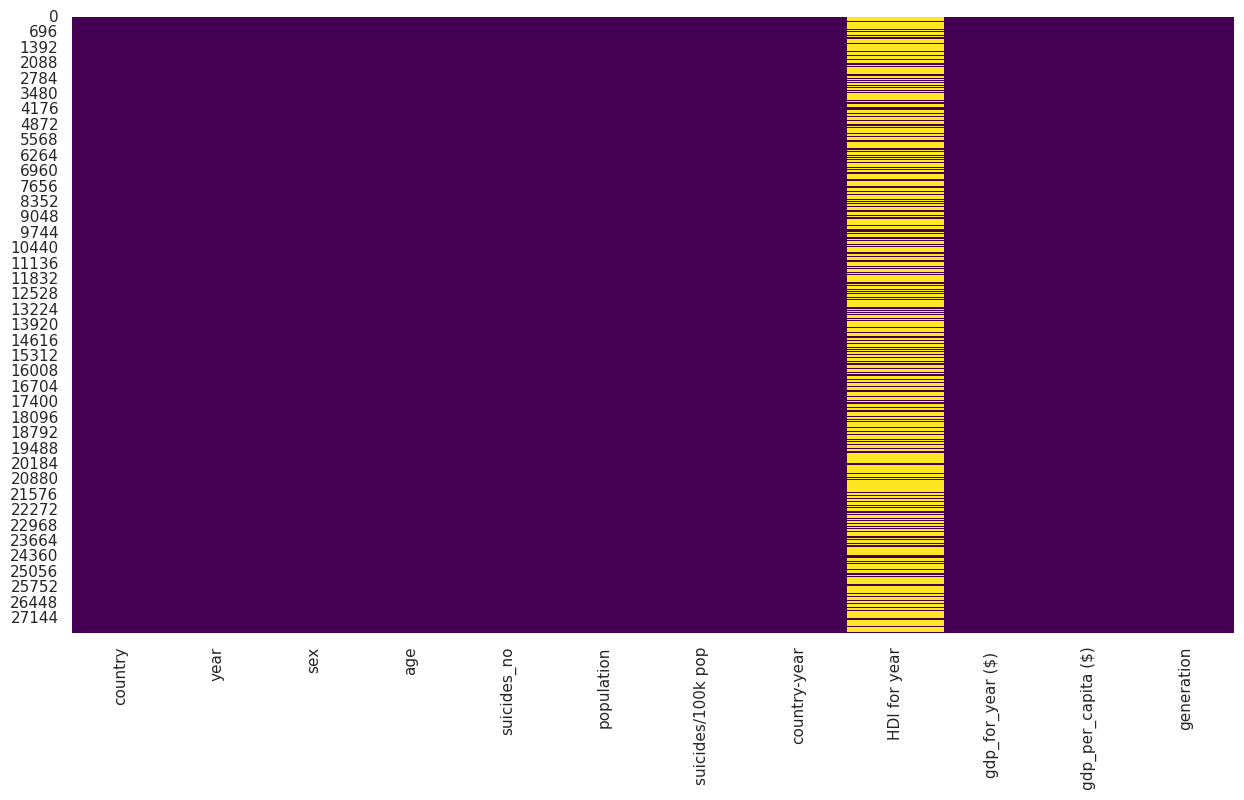

In [15]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [16]:
# Handling missing values
# Imputing missing values with the mean for continuous variables and mode for categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

# Checking for missing values before imputation
missing_values = df.isnull().sum()

# Rechecking for missing values after imputation
missing_values_after = df.isnull().sum()

(missing_values, missing_values_after)

(country               0
 year                  0
 sex                   0
 age                   0
 suicides_no           0
 population            0
 suicides/100k pop     0
 country-year          0
 HDI for year          0
  gdp_for_year ($)     0
 gdp_per_capita ($)    0
 generation            0
 dtype: int64,
 country               0
 year                  0
 sex                   0
 age                   0
 suicides_no           0
 population            0
 suicides/100k pop     0
 country-year          0
 HDI for year          0
  gdp_for_year ($)     0
 gdp_per_capita ($)    0
 generation            0
 dtype: int64)

In [17]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
country,0,0.0
year,0,0.0
sex,0,0.0
age,0,0.0
suicides_no,0,0.0
population,0,0.0
suicides/100k pop,0,0.0
country-year,0,0.0
HDI for year,0,0.0
gdp_for_year ($),0,0.0


### Duplicate Value

In [18]:
df[df.duplicated(keep=False)]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation


In [19]:
df.duplicated().sum()

0

In [20]:
# Drop duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(27820, 12)

In [22]:
# Get the list of categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Create a DataFrame containing counts of unique values for each categorical column
cat_df = pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
                      .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])

# Display summary statistics of categorical variables
display(df[cat_cols].describe())

# Display counts of unique values for each categorical column
display(cat_df)

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,male,15-24 years,Albania1987,"2,156,624,900",Generation X
freq,382,13910,4642,12,12,6408


count
column             value                 
 gdp_for_year ($)  411,755,164,833     10
                   42,773,029,835      10
                   20,304,098,101      10
                   152,451,923,077     10
                   20,153,871,681      10
...                                   ...
generation         Millenials        5844
                   Silent            6364
                   Generation X      6408
sex                male             13910
                   female           13910

[4757 rows x 1 columns]

In [23]:
df.describe(include='O').T

,count,unique,top,freq
country,27820,101,Mauritius,382
sex,27820,2,male,13910
age,27820,6,15-24 years,4642
country-year,27820,2321,Albania1987,12
gdp_for_year ($),27820,2321,"2,156,624,900",12
generation,27820,6,Generation X,6408


In [24]:
# Inspect useless features
df.nunique().sort_values()

sex                       2
age                       6
generation                6
year                     32
country                 101
HDI for year            306
suicides_no            2084
gdp_per_capita ($)     2233
country-year           2321
 gdp_for_year ($)      2321
suicides/100k pop      5298
population            25564
dtype: int64

<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">EXPLORATOTY DATA ANALYSIS</h2>
</div>

## Univariate Analysis

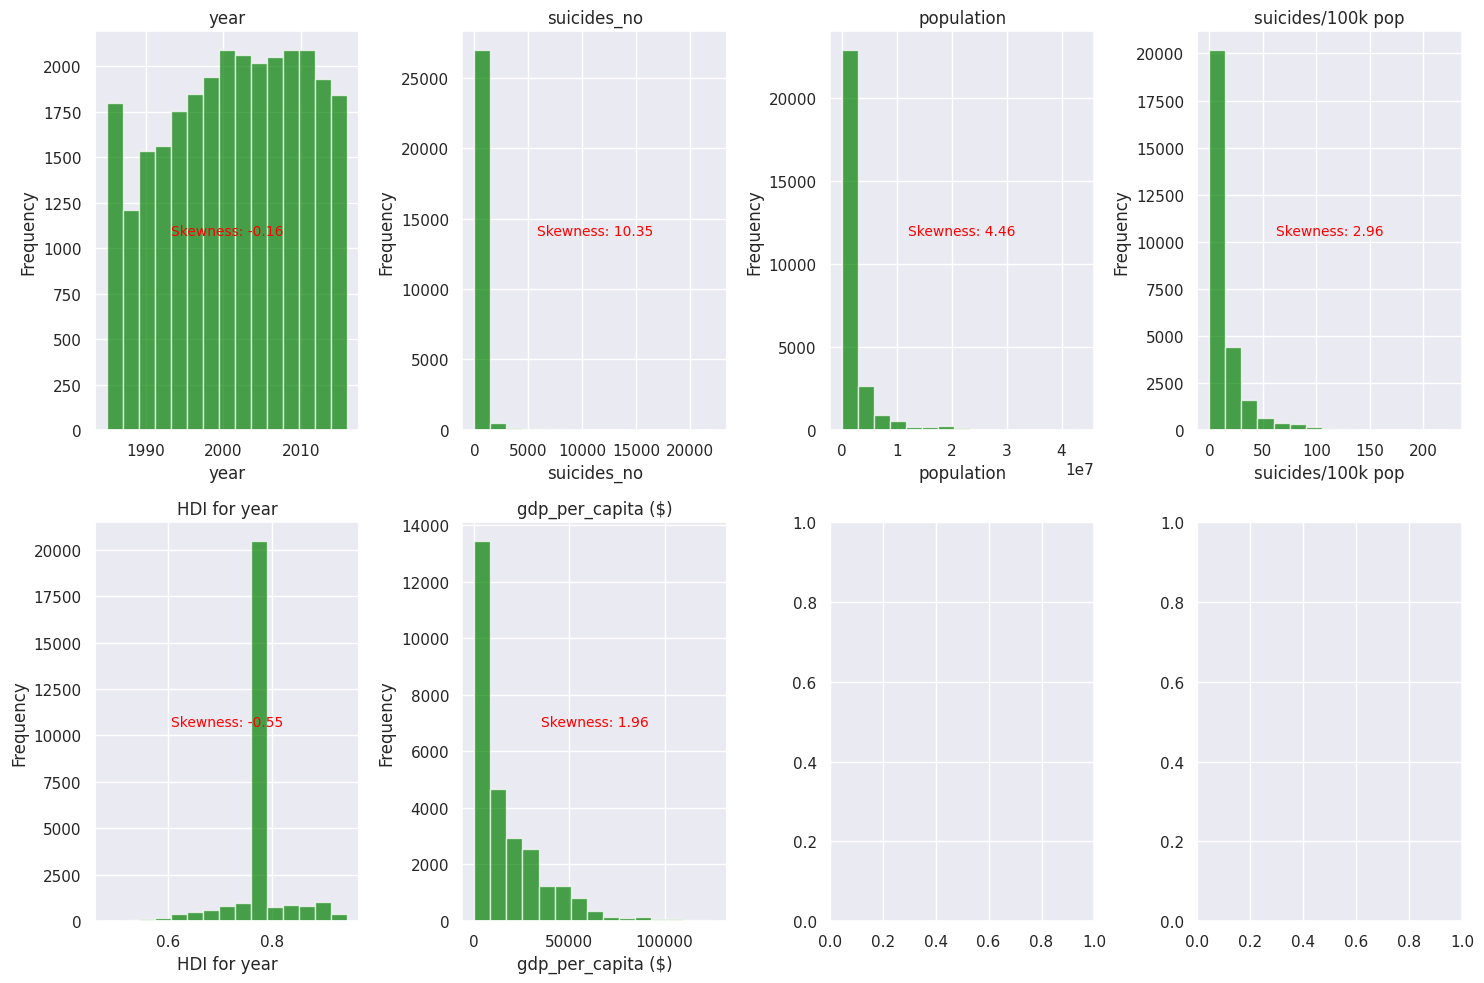

Skewness:
year                  -0.160241
suicides_no           10.352910
population             4.459414
suicides/100k pop      2.963414
HDI for year          -0.548664
gdp_per_capita ($)     1.963470
dtype: float64


In [25]:
# Calculate skewness for numerical columns
skewness = df.select_dtypes(include=['int64', 'float64']).skew()

# Count the number of numerical columns
num_cols_count = len(df.select_dtypes(include=['int64', 'float64']).columns)

# Determine the layout for subplots
num_rows = (num_cols_count + 3) // 4  # Adjust the number of columns in each row
num_cols = min(4, num_cols_count)  # Maximum of 4 columns in each row

# Plot histograms for numerical columns to visualize distributions and identify anomalies
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_rows):
    for j in range(num_cols):
        col_idx = i * num_cols + j
        if col_idx < num_cols_count:
            col = df.select_dtypes(include=['int64', 'float64']).columns[col_idx]
            axes[i, j].hist(df[col], bins=15, color='green', alpha=0.7)
            axes[i, j].set_title(f'{col}')
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel('Frequency')
            
            # Compute skewness
            skew_val = skewness[col]
            
            # Plot skewness value in the center of plot
            axes[i, j].text(0.5, 0.5, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                            verticalalignment='center', transform=axes[i, j].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print skewness values
print("Skewness:")
print(skewness)

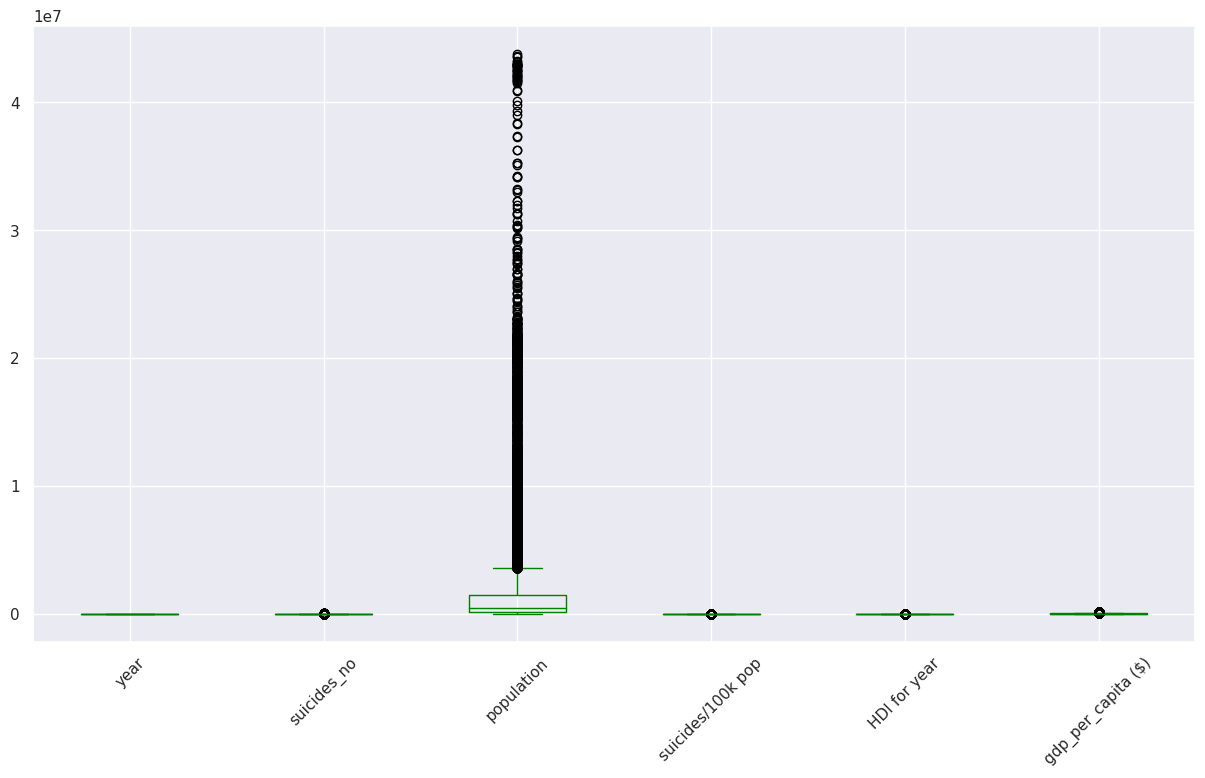

In [26]:
# Plot the boxplot with rotated text labels
df.plot(kind='box', rot=45,color='green')

# Show the plot
plt.show()

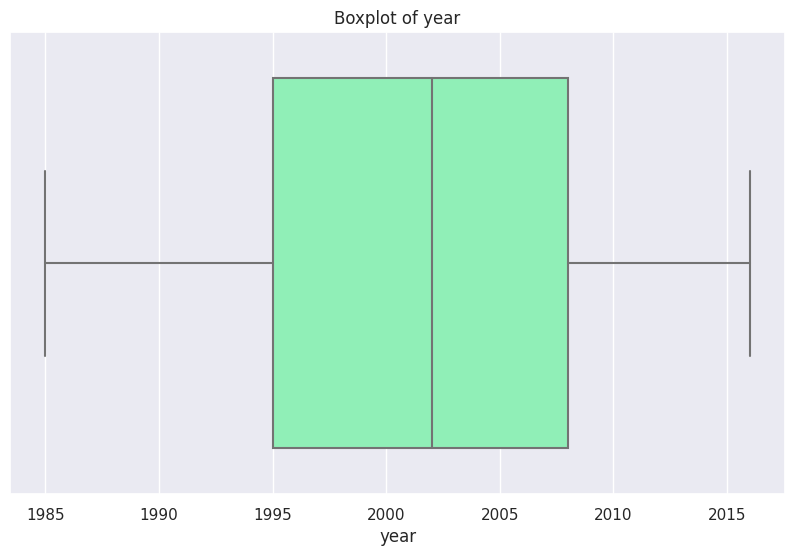

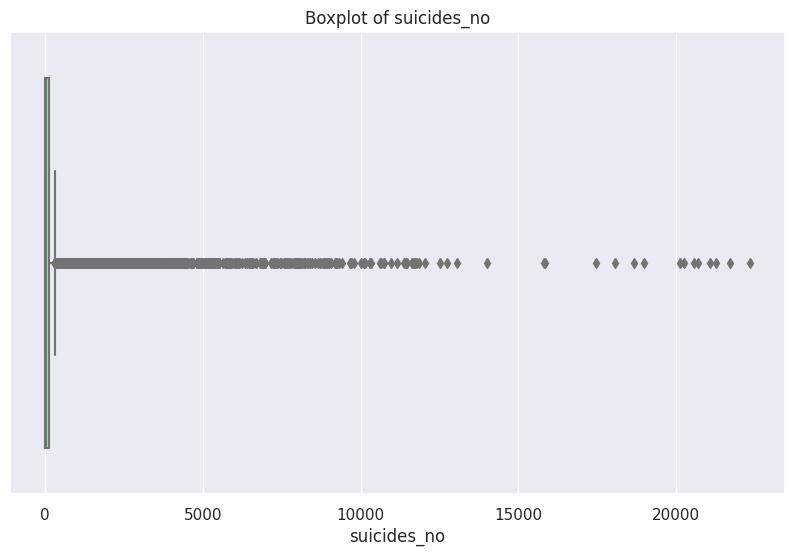

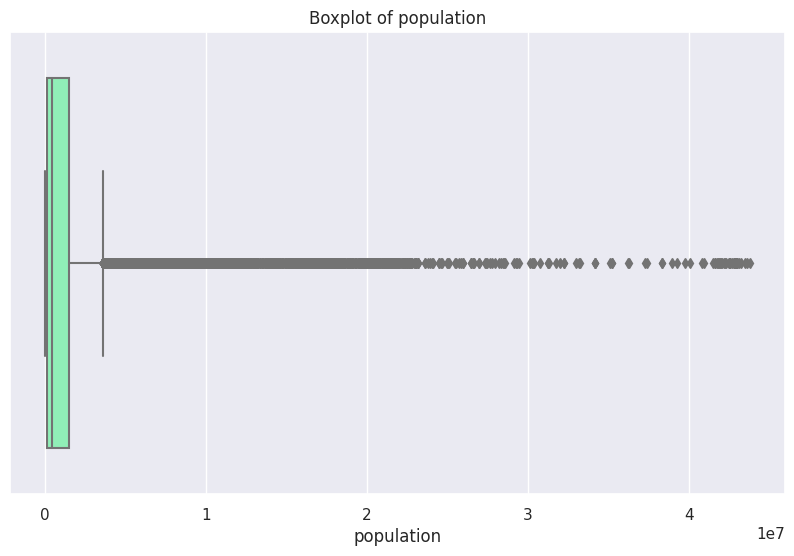

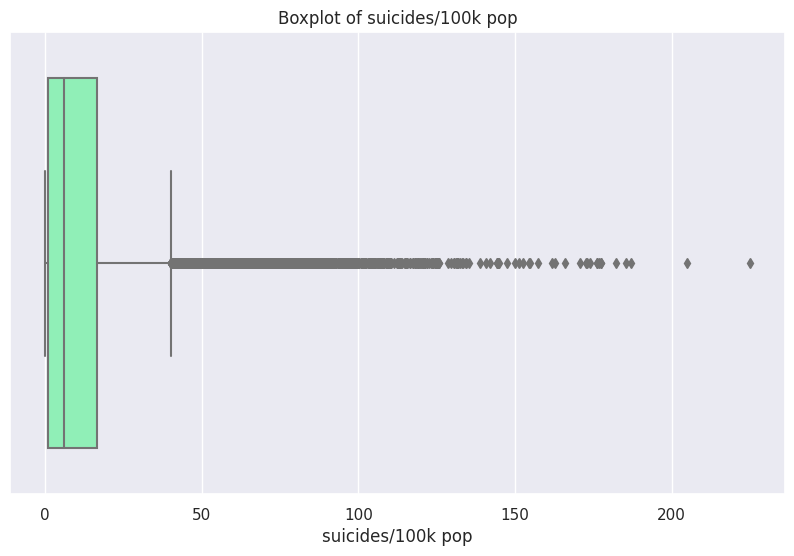

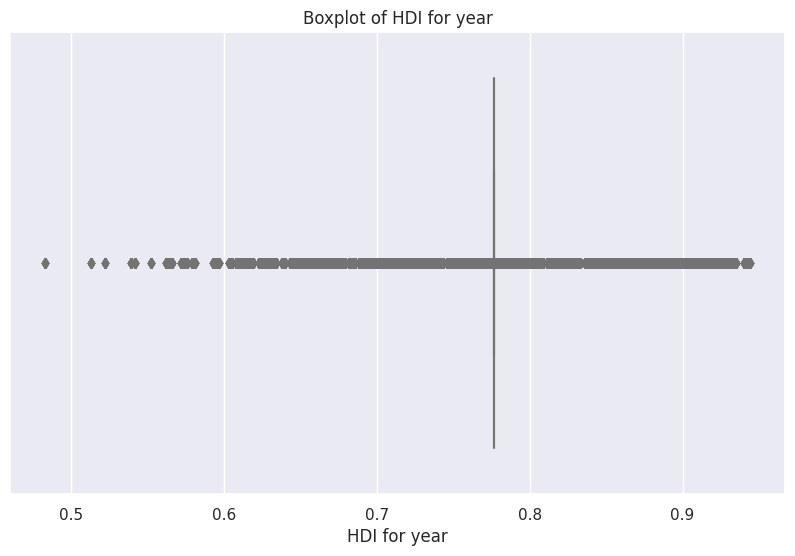

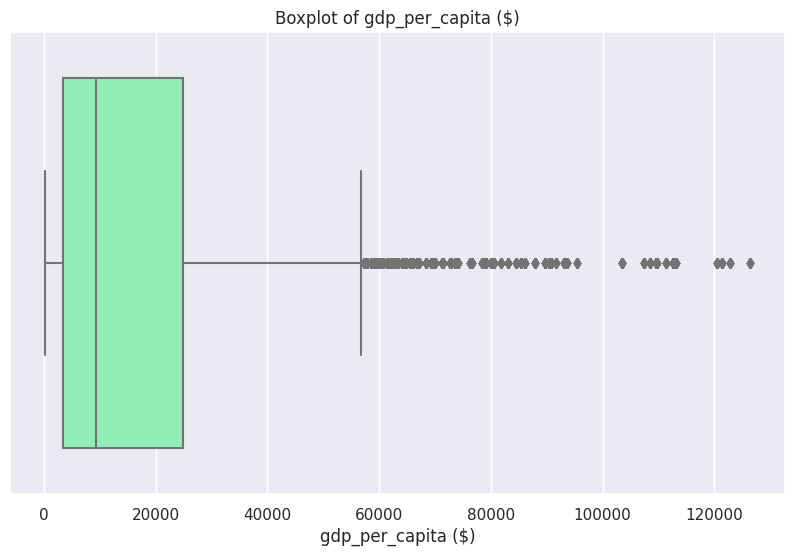

In [27]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical feature to identify outliers
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

## Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix')

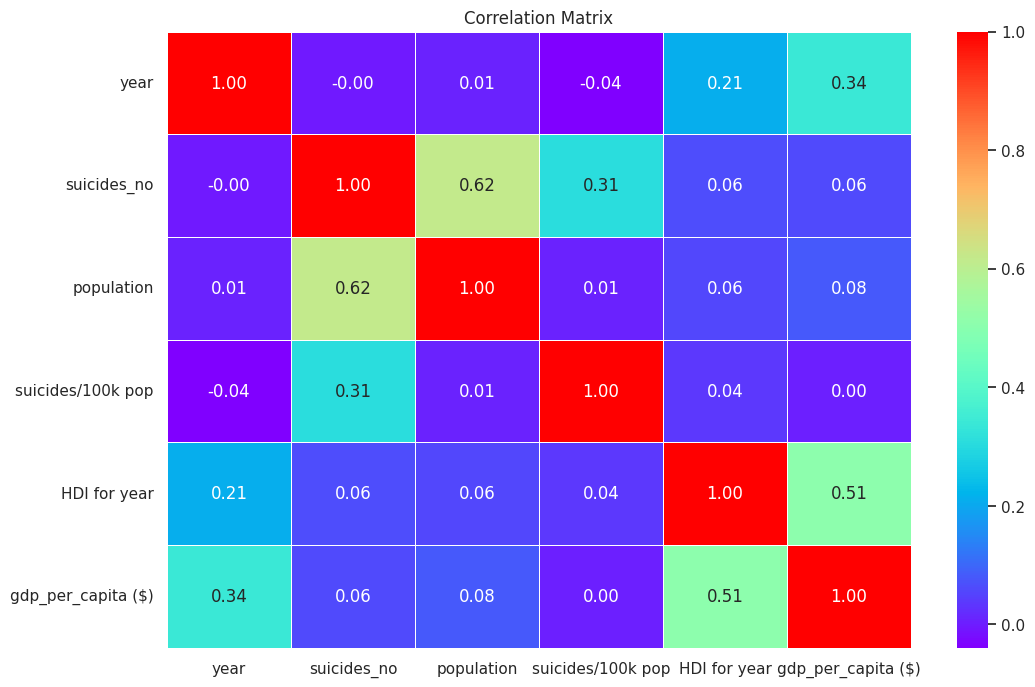

In [28]:
# Correlation matrix

# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

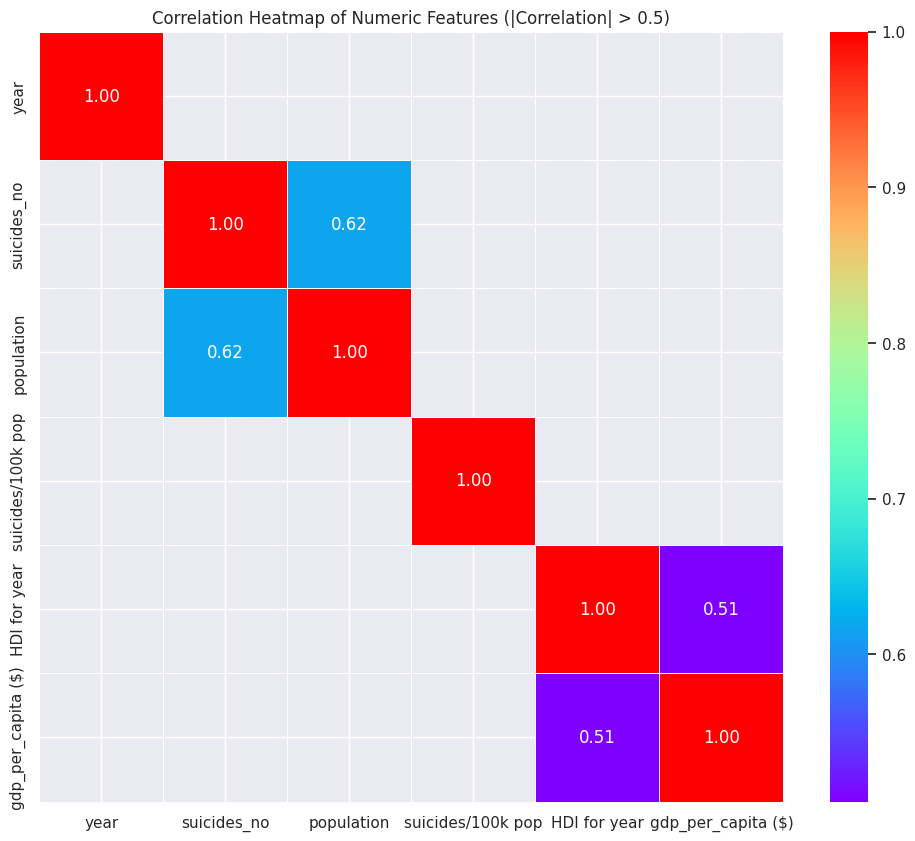

In [29]:
# Heatmap Plotting
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Filter correlation matrix to include values greater than 0.5 or less than -0.5
corr_matrix_filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Plot the heatmap with filtered correlation values
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features (|Correlation| > 0.5)')
plt.show()

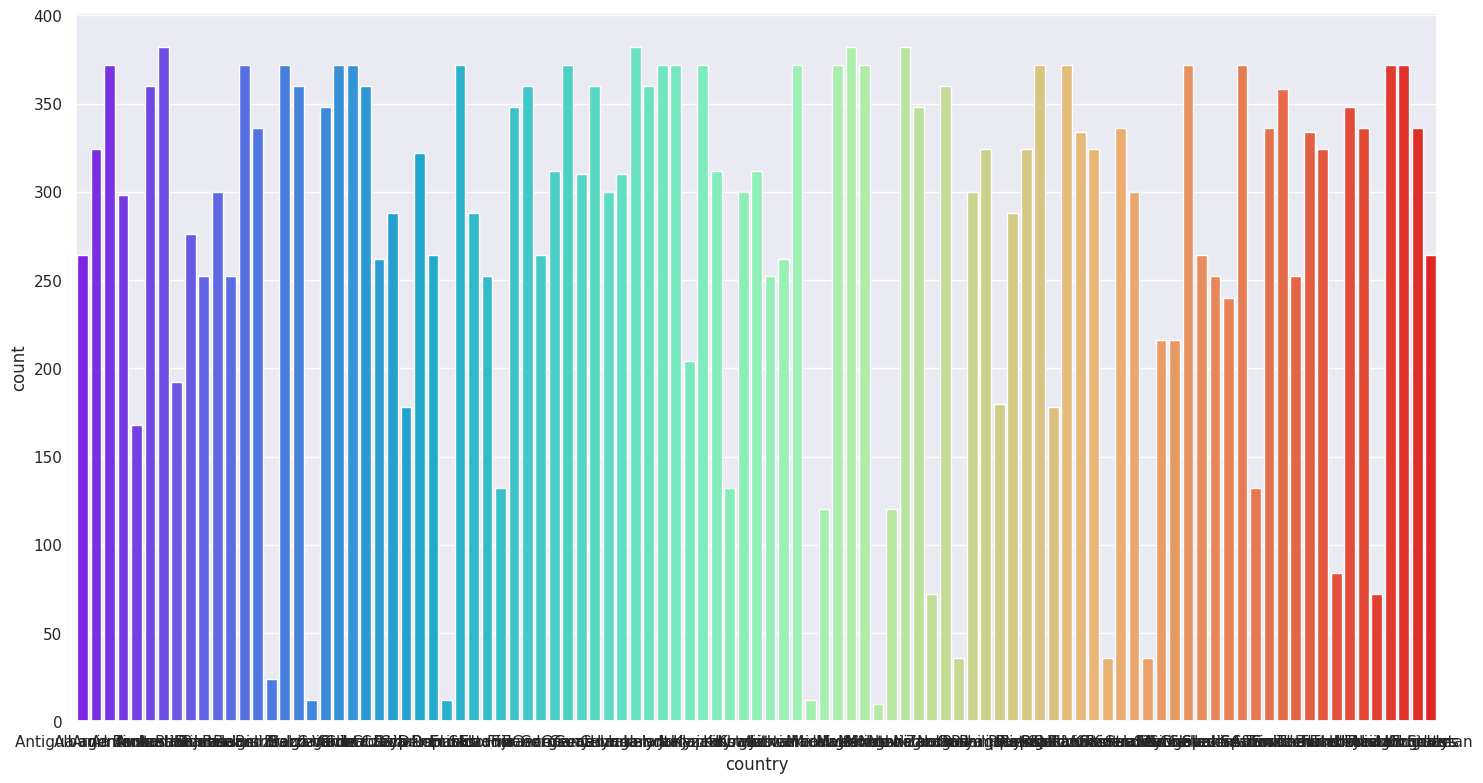

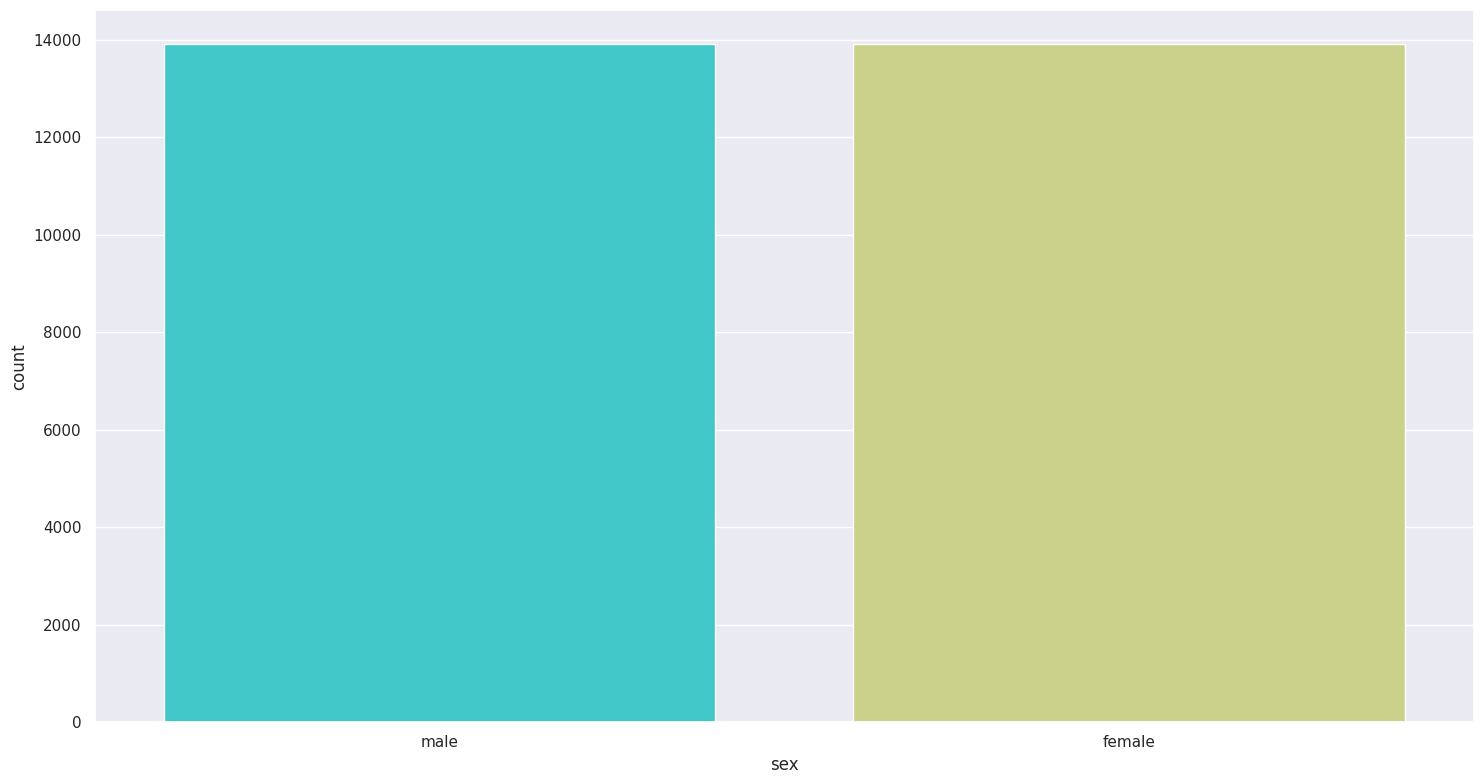

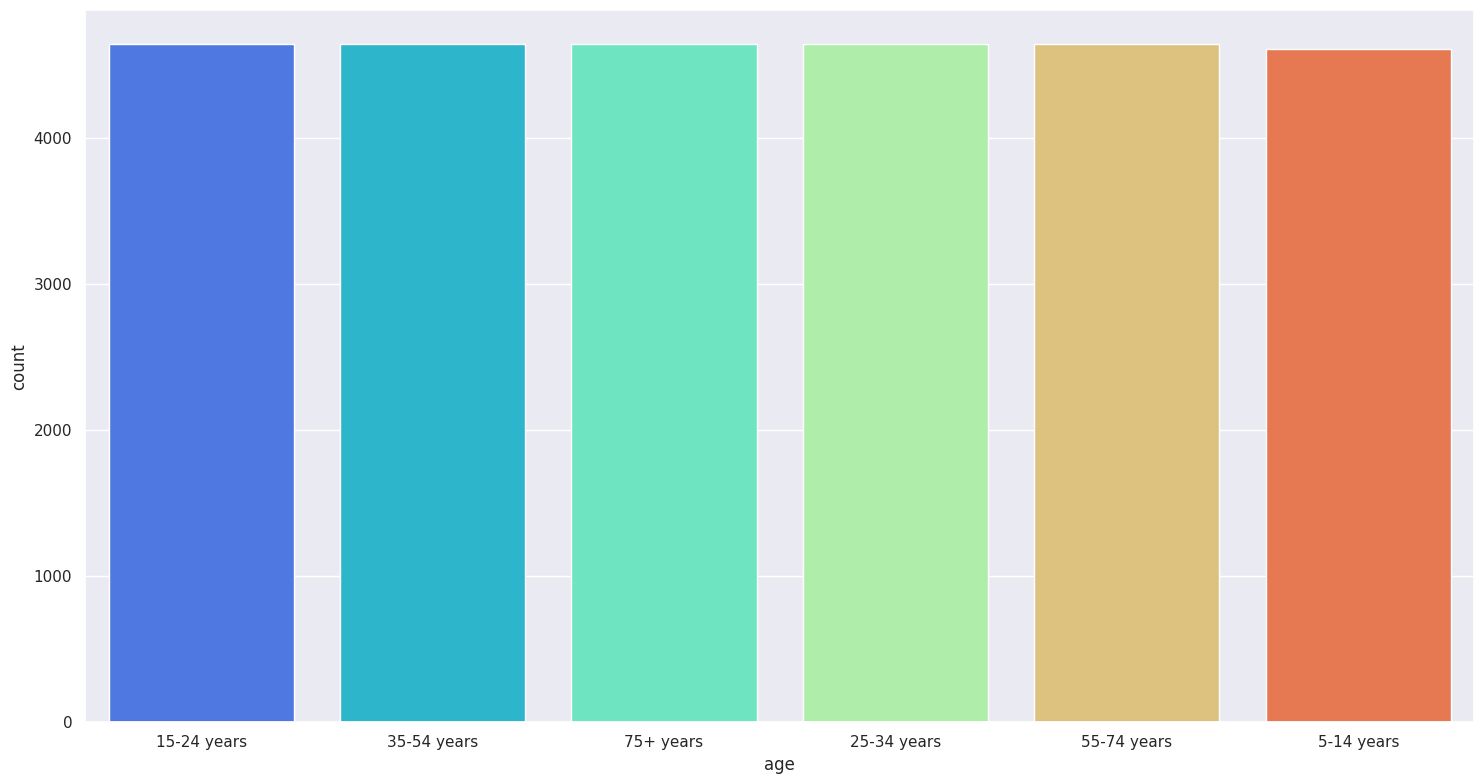

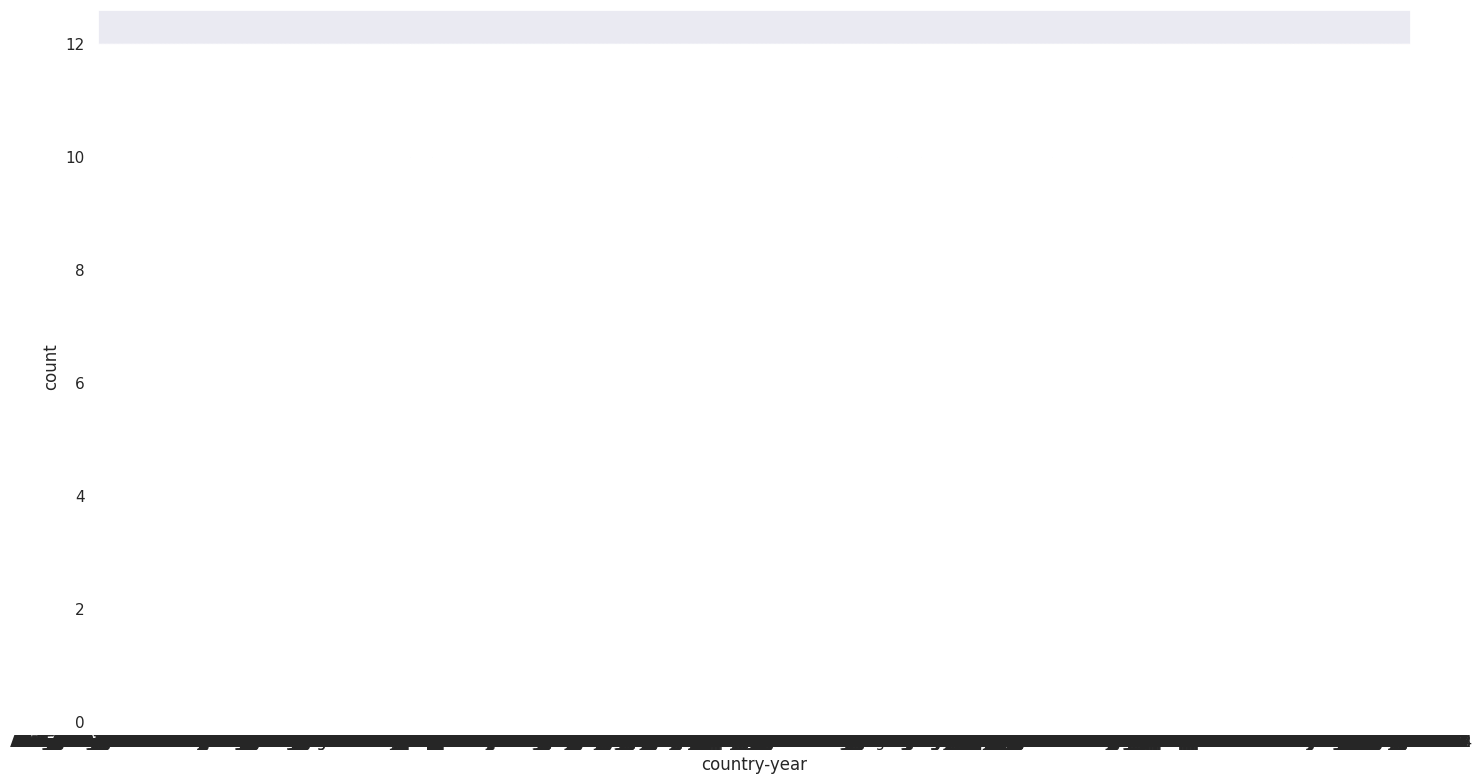

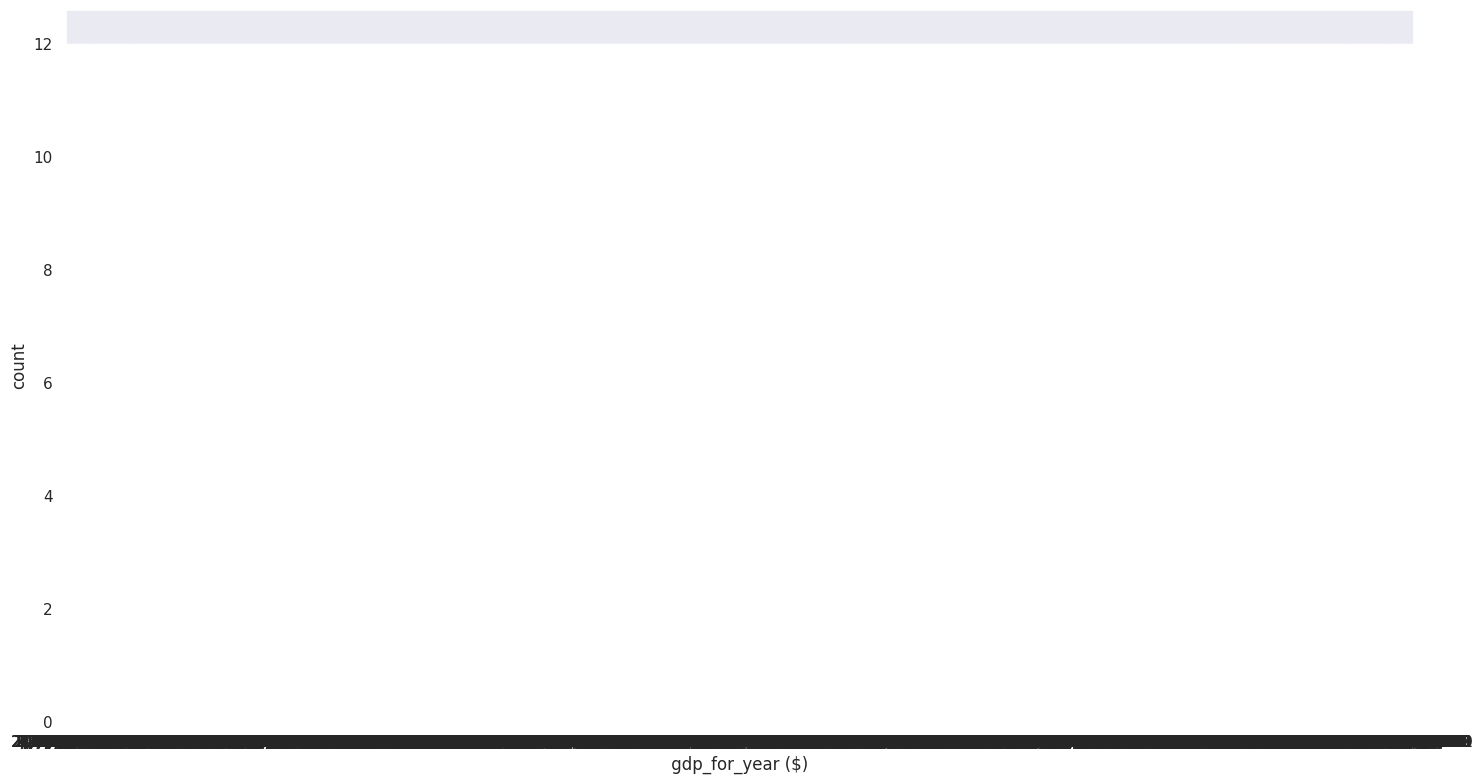

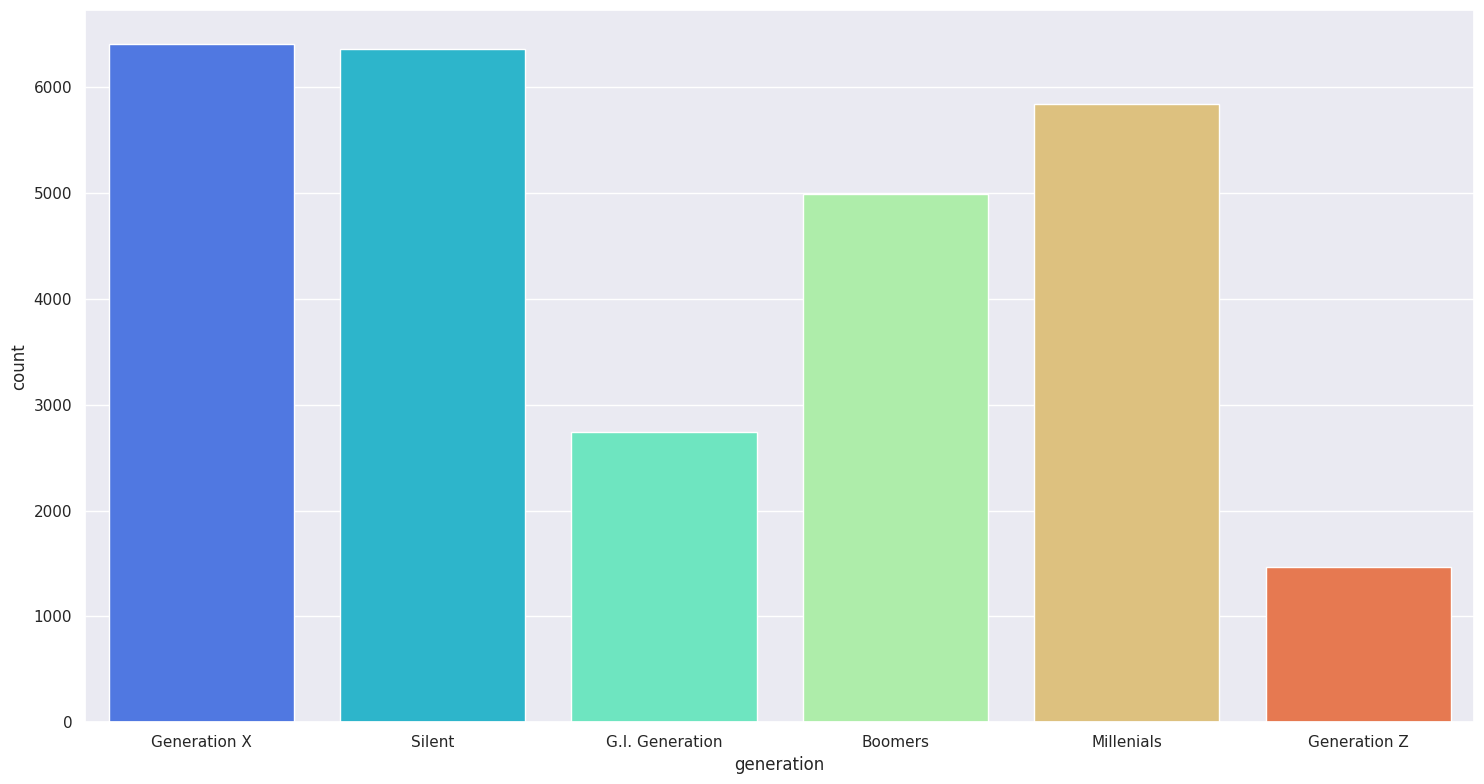

In [30]:
# Explore categorical features
for column in df.select_dtypes(include=['object']):
    sns.countplot(x=column, data=df,palette='rainbow')
    plt.tight_layout()
    plt.show()

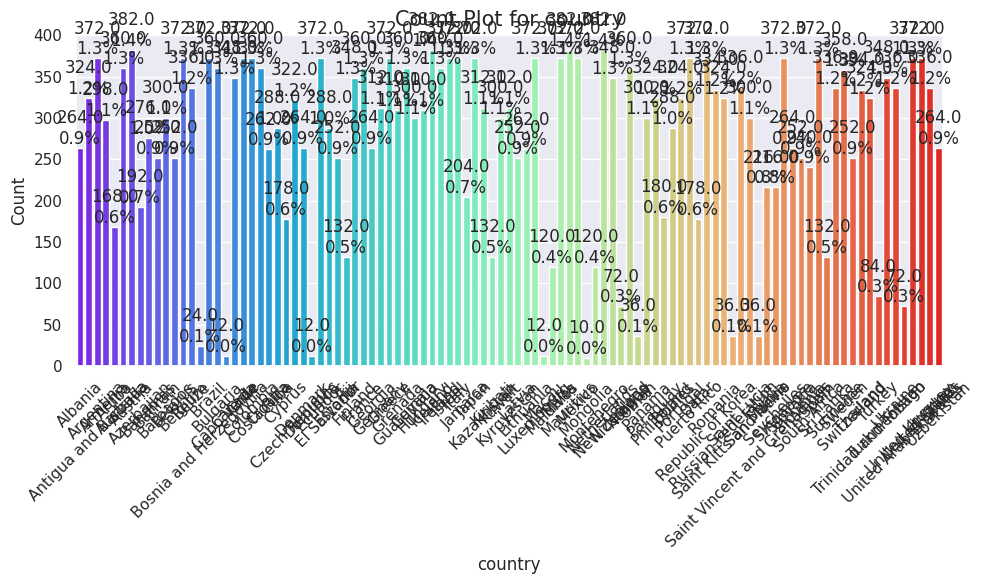

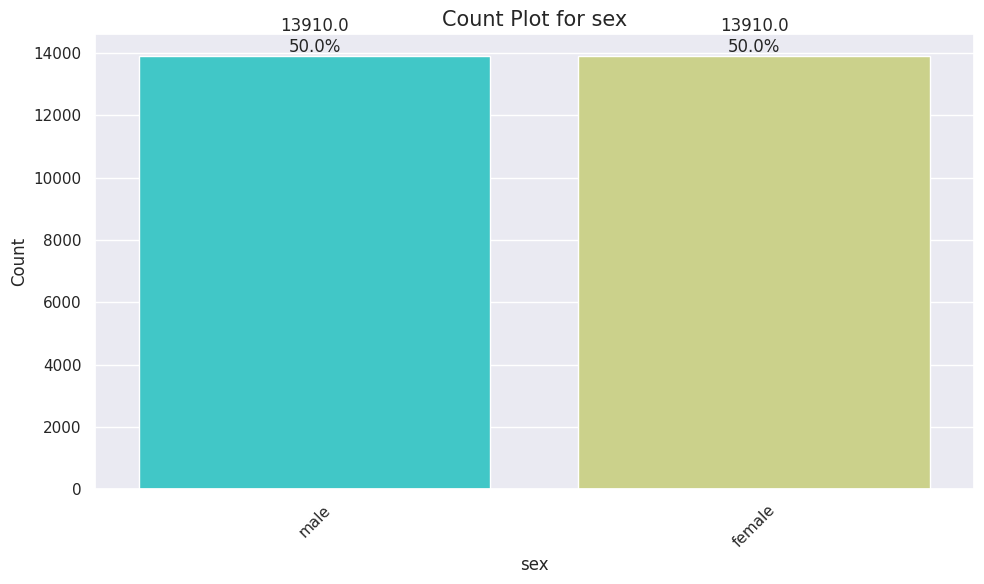

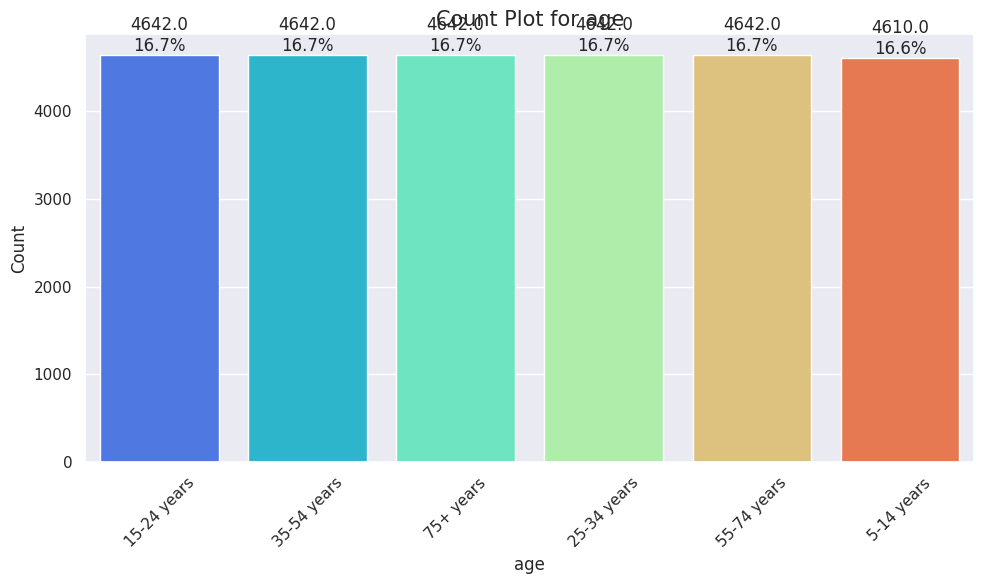

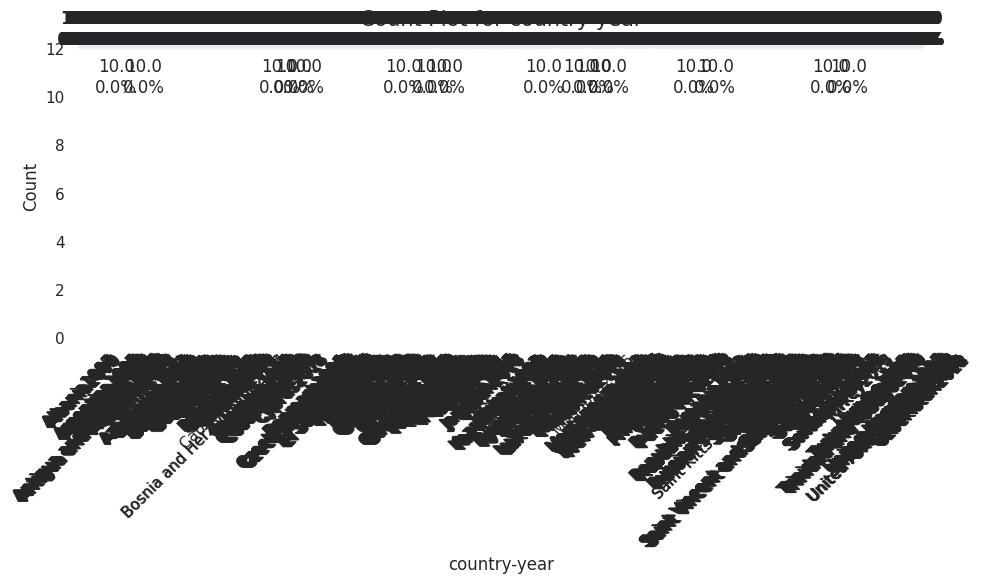

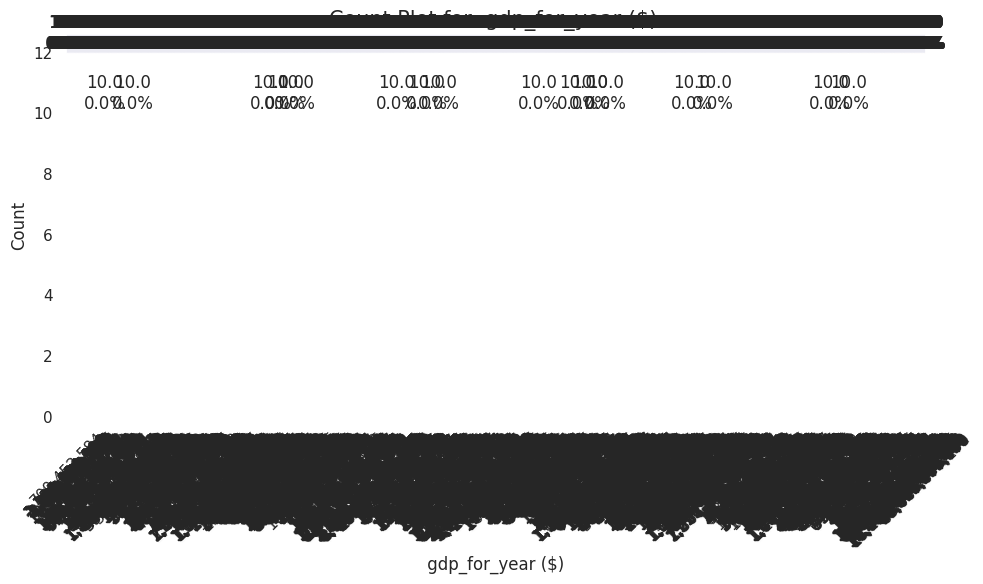

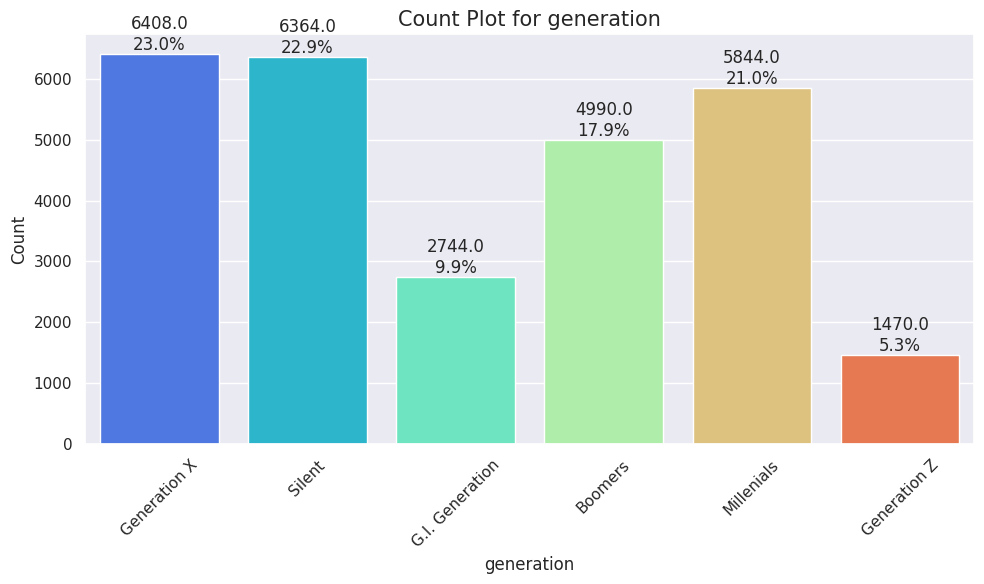

In [31]:
# Explore categorical features
for column in df.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=df,palette='rainbow')
    
    # Add count and percentage annotations to each bar
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n{percentage}', (x, y), ha='center', va='bottom')
    
    plt.title(f'Count Plot for {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

## Outlier Treatment

Number of outliers removed: 13620


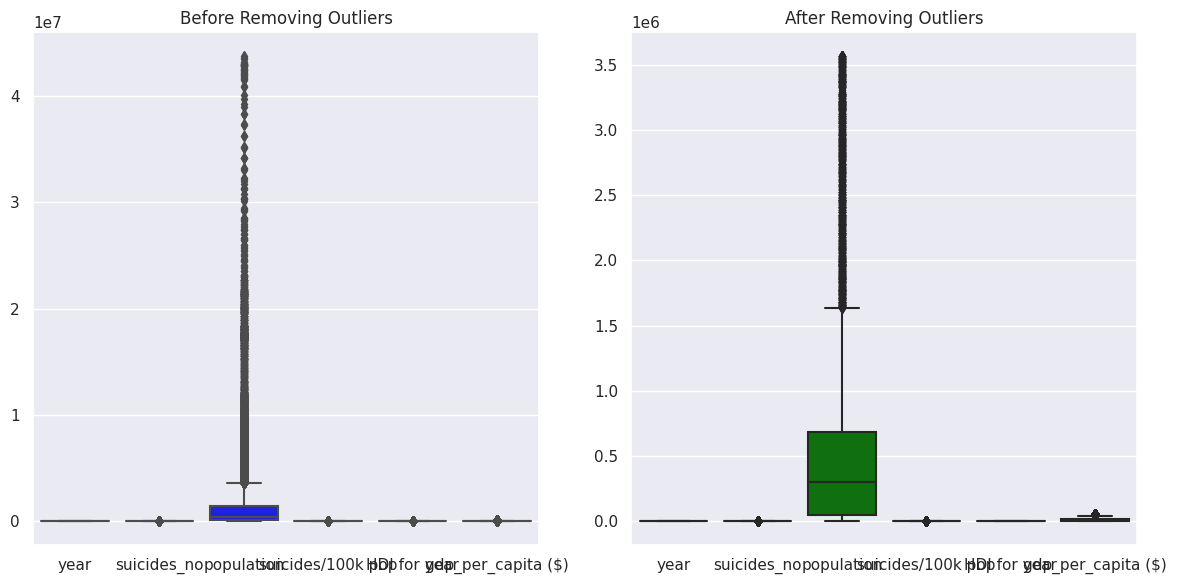

Number of outliers removed: 13620


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# df = ...

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)
    
    # Count the number of outliers removed
    num_outliers_removed = outliers.sum()
    
    # Filter DataFrame based on rows without outliers
    df_no_outliers = df[~outliers]
    
    return df_no_outliers, num_outliers_removed

# Remove outliers using IQR method and get the number of outliers removed
df_no_outliers, num_outliers_removed = remove_outliers_iqr(df)

print("Number of outliers removed:", num_outliers_removed)

# Function to plot boxplots before and after removing outliers
def plot_boxplots_before_after(df_before, df_after):
    # Set up the figure
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    # Boxplot before removing outliers (blue color)
    sns.boxplot(data=df_before, ax=axes[0], color='blue')
    axes[0].set_title('Before Removing Outliers')
    
    # Boxplot after removing outliers (green color)
    sns.boxplot(data=df_after, ax=axes[1], color='green')
    axes[1].set_title('After Removing Outliers')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot boxplots before and after outlier removal
plot_boxplots_before_after(df, df_no_outliers)
print("Number of outliers removed:", num_outliers_removed)